# ML lab 01

In [1]:
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
hello = tf.constant("Hello, TensorFlow!")

sess = tf.Session()

print(sess.run(hello))

b'Hello, TensorFlow!'


In [3]:
# 1. 그래프 빌드
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # tf.float32가 디폴트
node3 = tf.add(node1, node2)

print("node1:", node1, "node2:", node2)
print("node3:", node3)  # 결과값이 전혀 나오지 않음. 그냥 이런 텐서이다 라고 얘기하는 정도.

node1: Tensor("Const_1:0", shape=(), dtype=float32) node2: Tensor("Const_2:0", shape=(), dtype=float32)
node3: Tensor("Add:0", shape=(), dtype=float32)


In [4]:
# 2. 그래프 실행
sess = tf.Session()

In [5]:
# 3. 결과값 리턴
print(sess.run([node1, node2]))
print(sess.run(node3))

[3.0, 4.0]
7.0


텐서플로우 과정

1. 그래프 빌드
2. 그래프 실행
3. 그래프 업데이트 혹은 리턴

In [6]:
# 앞에서는 a, b를 미리 정해두고 실행했는데 이제는 실행할때 값을 주고싶다. - placeholder
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

# 실행할 노드, 노드들에 필요한 값을 주는 feed_dict - 딕셔너리 형태로 받는다.
# sess.run(operation,feed_dict = {x: x_data})
print(sess.run(adder_node, feed_dict = {a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict = {a: [1, 3], b: [2, 4]})) 
# 여러개 집어넣을 때는 리스트로 묶어서 넘겨준다. 노드 하나당은 하나만 받는다고 생각. 리스트 하나를 받는 것.

7.5
[3. 7.]


tensor에서는 rank, shape, type 세개가 중요하다

```python
t = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
```

tensor t는

- rank(차원) 2를 가지고\
- shape(차원의 모양)은 (3, 3)이다.
    - (바깥 리스트가 가지고 있는 리스트 3개, 각 안쪽 리스트들이 가지고 있는 요소 3개)
- type은 대부분 tf.float32 혹은 tf.int32

# ML lab 02

In [7]:
x_train = [1, 2, 3]
y_train = [1, 2, 3]

In [8]:
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')
# 여기서 tf.Variable은 텐서플로우가 자체적으로 변경시키는 값. trainable한 variable
# 만들때는 꼭 rank와 shape을 줘야함 rank1, shape1

In [9]:
hypothesis = x_train * W + b

cost = tf.reduce_mean(tf.square(hypothesis - y_train))

In [10]:
t = [1., 2., 3., 4.]
mean = tf.reduce_mean(t)
sess.run(mean)  # 그냥 평균내주는 것

2.5

In [11]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
# W, b라는 tf.Variable을 만들었음. 이걸 이용해 실행하기 전에는 꼭 tf.global_variables_initializer()해줘야함.
# 초기화를 해주는건데 이렇게 되어야 Variable이 완전히 생성.

In [12]:
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print('{:4d}\t{:.9f}\t{:.9f}\t{:.9f}'.format(step, sess.run(cost), *sess.run(W), *sess.run(b)))

   0	13.282539368	-0.321580887	-0.837952435
  20	0.126390636	0.955282331	-0.264199406
  40	0.006560382	1.073052049	-0.200900495
  60	0.004976959	1.080632567	-0.186613947
  80	0.004511273	1.077891946	-0.177382469
 100	0.004097127	1.074331284	-0.169002250
 120	0.003721080	1.070847392	-0.161055654
 140	0.003379544	1.067518711	-0.153486282
 160	0.003069360	1.064345717	-0.146273002
 180	0.002787639	1.061321616	-0.139398694
 200	0.002531781	1.058439732	-0.132847399
 220	0.002299397	1.055693269	-0.126603991
 240	0.002088351	1.053075910	-0.120654054
 260	0.001896677	1.050581574	-0.114983812
 280	0.001722588	1.048204422	-0.109579958
 300	0.001564482	1.045938969	-0.104430132
 320	0.001420889	1.043780088	-0.099522293
 340	0.001290477	1.041722655	-0.094845146
 360	0.001172035	1.039761662	-0.090387881
 380	0.001064458	1.037892938	-0.086139895
 400	0.000966753	1.036112189	-0.082091577
 420	0.000878024	1.034415126	-0.078233577
 440	0.000797435	1.032797694	-0.074556924
 460	0.000724244	1.031256437	-0.

In [13]:
# placeholder 이용. x, y가 미리 정해져있지 않고 데이터를 바꿔가며 써보고싶을때 쓰면 된다.
X = tf.placeholder(tf.float32, shape = None)
y = tf.placeholder(tf.float32, shape = None)
W = tf.Variable(tf.random_normal([1]), name = 'Weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

In [14]:
hypothesis = W * X + b
cost = tf.reduce_mean(tf.square(hypothesis - y))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [16]:
for step in range(2001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict = {X: [1, 2, 3], y: [1, 2, 3]})
        
    if step % 20 == 0:
        print('{:4d}\t{:.9f}\t{:.9f}\t{:.9f}'.format(step, cost_val, *W_val, *b_val))

print(*sess.run(hypothesis, feed_dict = {X: [5]}))
print(*sess.run(hypothesis, feed_dict = {X: [2.5]}))
print(*sess.run(hypothesis, feed_dict = {X: [1.5, 3.5]}))
print(*sess.run([W, b]))
sess.close()

   0	6.082481861	0.156250954	-0.394155055
  20	0.055196181	0.926926851	-0.054053050
  40	0.000544122	0.999968469	-0.020892339
  60	0.000044596	1.006597996	-0.016994869
  80	0.000036427	1.006918907	-0.015918501
 100	0.000033046	1.006653786	-0.015143873
 120	0.000030013	1.006346941	-0.014429711
 140	0.000027259	1.006049156	-0.013751370
 160	0.000024756	1.005764842	-0.013105074
 180	0.000022484	1.005493999	-0.012489151
 200	0.000020420	1.005235791	-0.011902190
 220	0.000018546	1.004989624	-0.011342786
 240	0.000016844	1.004755259	-0.010809689
 260	0.000015297	1.004531741	-0.010301689
 280	0.000013894	1.004318833	-0.009817555
 300	0.000012619	1.004115939	-0.009356239
 320	0.000011460	1.003922462	-0.008916588
 340	0.000010409	1.003738046	-0.008497549
 360	0.000009454	1.003562450	-0.008098217
 380	0.000008586	1.003395081	-0.007717690
 400	0.000007798	1.003235459	-0.007355000
 420	0.000007082	1.003083467	-0.007009346
 440	0.000006432	1.002938509	-0.006679959
 460	0.000005842	1.002800465	-0.00

In [17]:
# Lab 2 Linear Regression
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# Try to find values for W and b to compute y_data = x_data * W + b
# We know that W should be 1 and b should be 0
# But let TensorFlow figure it out
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    # Fit the line
    for step in range(2001):
        _, cost_val, W_val, b_val = sess.run([train, cost, W, b])

        if step % 20 == 0:
            print('{:4d}\t{:.9f}\t{:.9f}\t{:.9f}'.format(step, cost_val, *W_val, *b_val))

# Learns best fit W:[ 1.],  b:[ 0.]

   0	0.634475768	1.272931576	-1.246247053
  20	0.175610498	1.457960486	-1.100641012
  40	0.155859873	1.455277801	-1.040627480
  60	0.141521543	1.435675383	-0.990932763
  80	0.128531888	1.415371060	-0.944287479
 100	0.116734706	1.395866513	-0.899902344
 120	0.106020302	1.377263665	-0.857609570
 140	0.096289285	1.359533668	-0.817304909
 160	0.087451495	1.342636943	-0.778894484
 180	0.079424843	1.326534271	-0.742289305
 200	0.072134860	1.311188340	-0.707404375
 220	0.065514058	1.296563745	-0.674158990
 240	0.059500936	1.282626390	-0.642476141
 260	0.054039732	1.269343853	-0.612282097
 280	0.049079750	1.256685734	-0.583507121
 300	0.044575002	1.244622231	-0.556084335
 320	0.040483687	1.233126044	-0.529950321
 340	0.036767948	1.222169995	-0.505044580
 360	0.033393245	1.211728811	-0.481309444
 380	0.030328289	1.201778412	-0.458689749
 400	0.027544672	1.192295671	-0.437133133
 420	0.025016522	1.183258533	-0.416589558
 440	0.022720382	1.174646020	-0.397011399
 460	0.020635031	1.166438341	-0.37

# ML lab 03

In [18]:
import matplotlib.pyplot as plt
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)  # W를 placeholder로 줬다는거는 임의로 이 값을 바꿔볼 것이다.
hypothesis = X * W  # 편의상 b는 생략한 모델을 생각해보자

In [19]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()
# sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []

In [20]:
for i in range(-30, 50):
    feed_W = i * 0.1  # feed_W를 -3부터 5까지 옮겨가며 cost와 W를 계산할 것
    curr_cost, curr_W = sess.run([cost, W], feed_dict = {W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

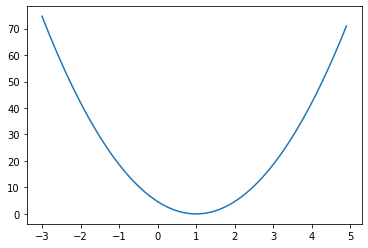

In [21]:
plt.plot(W_val, cost_val)
plt.show()

In [22]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name = 'weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W
cost = tf.reduce_sum(tf.square(hypothesis - Y))

learning_rate = 0.1
gradient = tf.reduce_mean(2 * (W * X - Y) * X)  # 미분식
descent = W - learning_rate * gradient  # 새로운 W값
update = W.assign(descent)  # W에 descent를 assign하는 operation을 update라고 칭하겠다.
# W = W - learning_rate * gradient 라고 쓰고싶겠지만 tensor는 그렇게 작동 못한다.
# 새로운 W를 descent에 할당하고 그걸 새로 업데이트 해주는 tensor를 만들어야한다.
# 물론 update = W.assign(W - learning_rate * gradient) 이렇게 써도 된다.

In [23]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict = {X: x_data, Y: y_data})
    print('{:2d}\t{:.5f}\t{:.5f}'.format(step, sess.run(cost, feed_dict = {X: x_data, Y: y_data}), *sess.run(W)))

 0	0.36719	0.83805
 1	0.00163	0.98920
 2	0.00001	0.99928
 3	0.00000	0.99995
 4	0.00000	1.00000
 5	0.00000	1.00000
 6	0.00000	1.00000
 7	0.00000	1.00000
 8	0.00000	1.00000
 9	0.00000	1.00000
10	0.00000	1.00000
11	0.00000	1.00000
12	0.00000	1.00000
13	0.00000	1.00000
14	0.00000	1.00000
15	0.00000	1.00000
16	0.00000	1.00000
17	0.00000	1.00000
18	0.00000	1.00000
19	0.00000	1.00000
20	0.00000	1.00000


In [24]:
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')
X = tf.placeholder(tf.float32, shape = None)
y = tf.placeholder(tf.float32, shape = None)

x_data = [1, 2, 3]; y_data = [1, 2, 3]
learning_rate = 0.1

gradient_W = tf.reduce_mean(2 * (W * X + b - y) * X)
gradient_b = tf.reduce_mean(2 * (W * X + b - y))

update_W = W.assign(W - learning_rate * gradient_W)
update_b = b.assign(b - learning_rate * gradient_b)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1000):
        W_val, b_val, _, _ = sess.run([W, b, update_W, update_b], feed_dict = {X: x_data, y: y_data})
        if step % 50 == 0:
            print('{:2d}\t{:.5f}\t{:.5f}'.format(step, *W_val, *b_val))

 0	0.86683	0.54201
50	0.93443	0.14906
100	0.98058	0.04416
150	0.99425	0.01308
200	0.99830	0.00387
250	0.99950	0.00115
300	0.99985	0.00034
350	0.99996	0.00010
400	0.99999	0.00003
450	1.00000	0.00001
500	1.00000	0.00000
550	1.00000	0.00000
600	1.00000	0.00000
650	1.00000	0.00000
700	1.00000	0.00000
750	1.00000	0.00000
800	1.00000	0.00000
850	1.00000	0.00000
900	1.00000	0.00000
950	1.00000	0.00000


In [25]:
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(tf.reduce_mean(tf.square(W * X + b - y)))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1000):
        _, W_val, b_val = sess.run([train, W, b], feed_dict = {X: [1, 2, 3], y: [1, 2, 3]})
        if step % 50 == 0:
            print('{:3d}\t{:.5f}\t{:.5f}'.format(step, *W_val, *b_val))

  0	1.12689	-0.13409
 50	1.02073	-0.04714
100	1.00614	-0.01396
150	1.00182	-0.00414
200	1.00054	-0.00123
250	1.00016	-0.00036
300	1.00005	-0.00011
350	1.00001	-0.00003
400	1.00000	-0.00001
450	1.00000	-0.00000
500	1.00000	-0.00000
550	1.00000	-0.00000
600	1.00000	-0.00000
650	1.00000	-0.00000
700	1.00000	-0.00000
750	1.00000	-0.00000
800	1.00000	-0.00000
850	1.00000	-0.00000
900	1.00000	-0.00000
950	1.00000	-0.00000


# ML lab 04-1

In [26]:
tf.set_random_seed(777)  # for reproducibility

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]))
w2 = tf.Variable(tf.random_normal([1]))
w3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hypothesis = w1 * x1 + w2 * x2 + w3 * x3 + b

cost = tf.reduce_mean(tf.square(hypothesis - y))

train = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)

In [27]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        _, hy_val, cost_val = sess.run([train, hypothesis, cost], 
                                       feed_dict = {x1: x1_data, x2: x2_data, x3: x3_data, y: y_data})
        if step % 100 == 0:
            print(step, hy_val, cost_val)

0 [71.90421 79.75805 82.25426 87.56616 60.68464] 9083.104
100 [156.29443 181.42369 182.30484 196.53426 138.2755 ] 10.140356
200 [156.17319 181.50665 182.26749 196.50876 138.38307] 9.620293
300 [156.05519 181.58737 182.23112 196.48396 138.48778] 9.127689
400 [155.94032 181.66599 182.19574 196.45985 138.58966] 8.660991
500 [155.8285  181.74248 182.16129 196.43642 138.68878] 8.218939
600 [155.71968 181.81694 182.12775 196.41367 138.78523] 7.8002105
700 [155.61374 181.8894  182.09508 196.39153 138.8791 ] 7.4035096
800 [155.51062 181.95996 182.0633  196.37003 138.97044] 7.0277205
900 [155.41022 182.02864 182.03233 196.34912 139.05931] 6.6716948
1000 [155.3125  182.09547 182.0022  196.3288  139.14577] 6.3344946
1100 [155.21738 182.16052 181.97285 196.30905 139.22992] 6.0150323
1200 [155.12476 182.22386 181.94427 196.28986 139.31177] 5.7123713
1300 [155.03464 182.28552 181.91647 196.27122 139.39145] 5.425677
1400 [154.94687 182.34552 181.8894  196.2531  139.46895] 5.154086
1500 [154.86147 182

In [28]:
tf.set_random_seed(777)  # for reproducibility

x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

X = tf.placeholder(tf.float32, shape = [None, 3])
# 데이터가 몇개 들어올지는 모르고 feature는 3개다.
# [row, col]이 들어온다고 생각. 이때 데이터가 몇개 들어올지는 모르니까 None
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

train = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        _, hy_val, cost_val = sess.run([train, hypothesis, cost], 
                                       feed_dict = {X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, hy_val, cost_val, sep = '\n', end = '\n\n')

0
[[-39.4316  ]
 [-62.887066]
 [-53.819584]
 [-58.30785 ]
 [-52.47447 ]]
51051.695

100
[[160.66435]
 [178.1394 ]
 [183.39468]
 [200.03809]
 [131.47777]]
52.13723

200
[[160.39345]
 [178.32568]
 [183.31238]
 [199.97318]
 [131.72676]]
49.45878

300
[[160.12982]
 [178.50691]
 [183.23228]
 [199.90987]
 [131.96916]]
46.921326

400
[[159.87332]
 [178.68332]
 [183.15439]
 [199.84816]
 [132.20515]]
44.517433

500
[[159.62375]
 [178.85495]
 [183.07858]
 [199.788  ]
 [132.43492]]
42.240093

600
[[159.38089]
 [179.022  ]
 [183.00485]
 [199.72934]
 [132.6586 ]]
40.08257

700
[[159.14458]
 [179.18451]
 [182.93314]
 [199.67213]
 [132.87639]]
38.038612

800
[[158.91464]
 [179.34268]
 [182.86337]
 [199.6164 ]
 [133.08841]]
36.102238

900
[[158.69092]
 [179.49658]
 [182.79547]
 [199.562  ]
 [133.29483]]
34.26769

1000
[[158.47324]
 [179.64635]
 [182.72945]
 [199.50899]
 [133.49583]]
32.529617

1100
[[158.26143]
 [179.79208]
 [182.66524]
 [199.45726]
 [133.69151]]
30.882996

1200
[[158.05534]
 [179.933

# ML lab 04-2

In [29]:
import numpy as np
xy = np.loadtxt('/home/data/data-01-test-score.csv', delimiter = ',', dtype = np.float32)
xy

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]], dtype=float32)

In [30]:
x_data = xy[:, :-1]
y_data = xy[:, [-1]]
# 여기 -1을 [-1] 이렇게 넣지 않으면 Y = tf.placeholder(tf.float32, shape = [None, 1]) 여기 들어가질 않음
print(x_data.shape, x_data, y_data.shape, y_data, sep = '\n\n')

(25, 3)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]

(25, 1)

[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [31]:
X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])
W = tf.Variable(tf.random_normal([3, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

train = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)

In [32]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict = {X: x_data, Y: y_data})
    if step % 100 == 0:
        print(step, cost_val, hy_val, sep = '\n', end = '\n\n')

0
4889.522
[[ 82.896484]
 [111.57126 ]
 [103.85621 ]
 [112.670364]
 [ 88.33291 ]
 [ 65.67213 ]
 [ 80.20309 ]
 [ 53.3645  ]
 [106.415924]
 [ 98.5498  ]
 [ 81.27839 ]
 [ 85.1861  ]
 [108.01663 ]
 [ 91.21475 ]
 [ 82.29199 ]
 [111.67417 ]
 [ 91.11056 ]
 [ 93.28185 ]
 [101.209694]
 [ 89.145805]
 [ 95.99137 ]
 [103.417625]
 [ 90.632774]
 [ 85.13391 ]
 [114.01451 ]]

100
39.456947
[[148.4746 ]
 [190.12225]
 [181.38805]
 [197.15434]
 [148.13635]
 [109.80245]
 [143.58592]
 [100.56135]
 [179.82149]
 [166.6189 ]
 [142.21739]
 [145.17268]
 [188.06558]
 [157.67467]
 [145.93124]
 [191.45363]
 [154.26581]
 [169.43864]
 [177.55884]
 [157.49748]
 [170.26295]
 [177.17117]
 [161.45445]
 [151.13332]
 [195.4437 ]]

200
37.826675
[[148.58084]
 [189.98831]
 [181.3872 ]
 [197.19824]
 [147.93222]
 [109.69061]
 [143.75891]
 [100.89329]
 [179.69043]
 [166.57327]
 [142.26004]
 [145.11649]
 [188.01385]
 [157.54953]
 [146.07095]
 [191.38474]
 [154.01083]
 [169.73532]
 [177.54266]
 [157.51947]
 [170.4123 ]
 [177.106

In [33]:
print(sess.run(hypothesis, feed_dict = {X: [[100, 70, 101]]}))  # test할때 X는 2차원으로 들어가야함.
print(sess.run(hypothesis, feed_dict = {X: [[60, 70, 110], [90, 100, 80]]}))

[[200.50162]]
[[159.55072]
 [176.07777]]


### 배치나누기

이해가 안된다

파일 자체가 너무 커서 한번에 읽기 곤란한 경우 혹은 파일 여러개에서 한번에 읽는 경우

1. 파일 합치기

```python
filename_queue = tf.train.string_input_producer(['data01', 'data02', ...], shuffle = False, name = 'filename_queue')
```
    
2. 읽기

```python
reder = tf.TextLineReader()
key, value = reader.read(filename_queue)
```
    
3. 값 parsing, 데이터 타입 정의 등..

```python
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults = record_defaults)
```

In [34]:
tf.set_random_seed(777)  # for reproducibility

filename_queue = tf.train.string_input_producer(
    ['/home/data/data-01-test-score.csv'], shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

# Default values, in case of empty columns. Also specifies the type of the
# decoded result.
record_defaults = [[0.], [0.], [0.], [0.]]  # 각각 field의 데이터 타입
xy = tf.decode_csv(value, record_defaults=record_defaults)  # csv decode

# collect batches of csv in
train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Start populating the filename queue.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_batch, Y: y_batch})
    if step % 100 == 0:
        print(step, "Cost:", cost_val, "\nPrediction:\n", hy_val, '\n\n')

coord.request_stop()
coord.join(threads)

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TextLineDataset`.
Instructions for updating:
Queue-base

# ML lab 05

In [35]:
# tf.cast, tf.equal 작동
sess = tf.Session()
print(sess.run(tf.cast(1 > 0.5, dtype = tf.float32)))
print(sess.run(tf.cast(tf.equal(1, 1), dtype = tf.float32)))
sess.close

1.0
1.0


<bound method BaseSession.close of <tensorflow.python.client.session.Session object at 0x7fc7557a1470>>

In [36]:
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

In [37]:
X = tf.placeholder(tf.float32, shape = [None, 2])
Y = tf.placeholder(tf.float32, shape = [None, 1])
W = tf.Variable(tf.random_normal([2, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

In [38]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict = {X: x_data, Y: y_data})
        if step % 1000 == 0:
            print('{:5d}\t\t{:.7f}'.format(step, cost_val))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X: x_data, Y: y_data})
    print('\n', h, c, a, sep = '\n\n')

    0		1.1903245
 1000		0.3544367
 2000		0.2985876
 3000		0.2611195
 4000		0.2315915
 5000		0.2077589
 6000		0.1882218
 7000		0.1719754
 8000		0.1582860
 9000		0.1466126
10000		0.1365507



[[0.02548951]
 [0.15105806]
 [0.27865526]
 [0.7936255 ]
 [0.9470268 ]
 [0.9826974 ]]

[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]

1.0


In [39]:
xy = np.loadtxt('/home/data/data-03-diabetes.csv', delimiter = ',', dtype = np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(x_data.shape, x_data, y_data.shape, y_data, sep = '\n\n')

(759, 8)

[[-0.294118    0.487437    0.180328   ...  0.00149028 -0.53117
  -0.0333333 ]
 [-0.882353   -0.145729    0.0819672  ... -0.207153   -0.766866
  -0.666667  ]
 [-0.0588235   0.839196    0.0491803  ... -0.305514   -0.492741
  -0.633333  ]
 ...
 [-0.411765    0.21608     0.180328   ... -0.219076   -0.857387
  -0.7       ]
 [-0.882353    0.266332   -0.0163934  ... -0.102832   -0.768574
  -0.133333  ]
 [-0.882353   -0.0653266   0.147541   ... -0.0938897  -0.797609
  -0.933333  ]]

(759, 1)

[[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [

In [40]:
X = tf.placeholder(tf.float32, shape = [None, 8])
Y = tf.placeholder(tf.float32, shape = [None, 1])
W = tf.Variable(tf.random_normal([8, 1]))
b = tf.Variable(tf.random_normal([1]))

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.005).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

In [41]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    feed = {X: x_data, Y: y_data}
    
    for step in range(10001):
        sess.run(train, feed_dict = feed)
        if step % 1000 == 0:
            print(step, sess.run(cost, feed_dict = feed))
            
    print('\n', *sess.run([hypothesis, predicted, accuracy], feed_dict = feed), sep = '\n\n')

0 0.6127287
1000 0.558461
2000 0.54250884
3000 0.5307415
4000 0.5216248
5000 0.5144174
6000 0.5086194
7000 0.50388443
8000 0.49996662
9000 0.4966882
10000 0.4939178



[[0.45798242]
 [0.89713764]
 [0.27737203]
 [0.9266707 ]
 [0.24643958]
 [0.7194366 ]
 [0.9210888 ]
 [0.58687335]
 [0.34609097]
 [0.51116246]
 [0.66533285]
 [0.22504002]
 [0.27487022]
 [0.38893768]
 [0.7046885 ]
 [0.46708536]
 [0.68802017]
 [0.86845124]
 [0.80598336]
 [0.58484757]
 [0.6296144 ]
 [0.15931612]
 [0.61933166]
 [0.67018455]
 [0.41001517]
 [0.91227055]
 [0.55598193]
 [0.6090165 ]
 [0.6972948 ]
 [0.481177  ]
 [0.93319535]
 [0.8013827 ]
 [0.5649214 ]
 [0.79450476]
 [0.3806644 ]
 [0.6145935 ]
 [0.7938241 ]
 [0.55820566]
 [0.5425578 ]
 [0.38879067]
 [0.78150964]
 [0.2071487 ]
 [0.44846582]
 [0.09872609]
 [0.61089426]
 [0.8966268 ]
 [0.69322956]
 [0.68638533]
 [0.9101236 ]
 [0.9181371 ]
 [0.90469193]
 [0.2965937 ]
 [0.40898377]
 [0.95045054]
 [0.29538262]
 [0.46476546]
 [0.16592935]
 [0.6978337 ]
 [0.8469635 ]
 [0.51

In [42]:
X = tf.placeholder(tf.float32, shape = [None, 8])
Y = tf.placeholder(tf.float32, shape = [None, 1])
W = tf.Variable(tf.random_normal([8, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1, 1]), name = 'bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate = 1e-3).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

In [43]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    feed = {X: x_data, Y: y_data}
    for step in range(20001):
        sess.run(train, feed_dict = feed)
        if step % 2000 == 0:
            print(step, sess.run(cost, feed_dict = feed))
            
    print(sess.run(accuracy, feed_dict = feed))

0 1.0453628
2000 0.71783376
4000 0.65588987
6000 0.6319225
8000 0.61513215
10000 0.60111433
12000 0.58899176
14000 0.5784235
16000 0.5691797
18000 0.56106967
20000 0.5539306
0.7088274


# ML lab 06-1

In [44]:
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

In [45]:
X = tf.placeholder(tf.float32, shape = [None, 4])
Y = tf.placeholder(tf.float32, shape = [None, 3])
W = tf.Variable(tf.random_normal([4, 3]), name = 'weight')
b = tf.Variable(tf.random_normal([3]), name = 'bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))

train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

In [46]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    feed = {X: x_data, Y: y_data}
    for step in range(2001):
        sess.run(train, feed_dict = feed)
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict = feed))
            
    a = sess.run(hypothesis, feed_dict = {X: [[1, 11, 7, 9]]})
    print()
    print(a, sess.run(tf.arg_max(a, 1)))
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 2, 1, 1]]})
    print()
    print(all, sess.run(tf.argmax(all, 1)))

0 4.151659
200 0.49153733
400 0.38063246
600 0.28467178
800 0.23825255
1000 0.21467552
1200 0.19544351
1400 0.17938064
1600 0.16573608
1800 0.15399241
2000 0.1437757

Instructions for updating:
Use `tf.math.argmax` instead
[[1.4556615e-03 9.9853563e-01 8.6868640e-06]] [1]

[[1.4556629e-03 9.9853563e-01 8.6868804e-06]
 [9.2186505e-01 7.0028231e-02 8.1066890e-03]
 [2.8308402e-06 1.0764663e-03 9.9892068e-01]] [1 0 2]


# ML lab 06-2

In [47]:
xy = np.loadtxt('/home/data/data-04-zoo.csv', delimiter = ',', dtype = np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape, x_data, y_data, sep = '\n\n')

(101, 16)

(101, 1)

[[1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]]

[[0.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [3.]
 [0.]
 [0.]
 [1.]
 [3.]
 [6.]
 [6.]
 [6.]
 [1.]
 [0.]
 [3.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [5.]
 [4.]
 [4.]
 [0.]
 [0.]
 [0.]
 [5.]
 [0.]
 [0.]
 [1.]
 [3.]
 [0.]
 [0.]
 [1.]
 [3.]
 [5.]
 [5.]
 [1.]
 [5.]
 [1.]
 [0.]
 [0.]
 [6.]
 [0.]
 [0.]
 [0.]
 [0.]
 [5.]
 [4.]
 [6.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [3.]
 [3.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [6.]
 [3.]
 [0.]
 [0.]
 [2.]
 [6.]
 [1.]
 [1.]
 [2.]
 [6.]
 [3.]
 [1.]
 [0.]
 [6.]
 [3.]
 [1.]
 [5.]
 [4.]
 [2.]
 [2.]
 [3.]
 [0.]
 [0.]
 [1.]
 [0.]
 [5.]
 [0.]
 [6.]
 [1.]]


In [48]:
nb_classes = len(np.unique(y_data))

X = tf.placeholder(tf.float32, shape = [None, x_data.shape[1]])
Y = tf.placeholder(tf.int32, shape = [None, y_data.shape[1]])

Y_one_hot = tf.one_hot(Y, nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

W = tf.Variable(tf.random_normal([16, nb_classes]), name = 'weight')
b = tf.Variable(tf.random_normal([1, nb_classes]), name = 'bias')

logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y_one_hot)

cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [49]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(optimizer, feed_dict = {X: x_data, Y: y_data})
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict = {X: x_data, Y: y_data})
            print(step, loss, acc)
            
    pred = sess.run(prediction, feed_dict = {X: x_data})
    
    for p, y in zip(pred, y_data.flatten()):
        print(p == int(y), p, int(y))

0 6.0241985 0.04950495
100 0.54039913 0.83168316
200 0.33802545 0.9009901
300 0.2513465 0.9306931
400 0.20061125 0.95049506
500 0.16706587 0.95049506
600 0.14322996 0.980198
700 0.12543094 1.0
800 0.11164228 1.0
900 0.1006515 1.0
1000 0.0916878 1.0
1100 0.08423816 1.0
1200 0.07794823 1.0
1300 0.07256571 1.0
1400 0.06790617 1.0
1500 0.06383213 1.0
1600 0.06023865 1.0
1700 0.05704456 1.0
1800 0.054185975 1.0
1900 0.051612053 1.0
2000 0.049281698 1.0
True 0 0
True 0 0
True 3 3
True 0 0
True 0 0
True 0 0
True 0 0
True 3 3
True 3 3
True 0 0
True 0 0
True 1 1
True 3 3
True 6 6
True 6 6
True 6 6
True 1 1
True 0 0
True 3 3
True 0 0
True 1 1
True 1 1
True 0 0
True 1 1
True 5 5
True 4 4
True 4 4
True 0 0
True 0 0
True 0 0
True 5 5
True 0 0
True 0 0
True 1 1
True 3 3
True 0 0
True 0 0
True 1 1
True 3 3
True 5 5
True 5 5
True 1 1
True 5 5
True 1 1
True 0 0
True 0 0
True 6 6
True 0 0
True 0 0
True 0 0
True 0 0
True 5 5
True 4 4
True 6 6
True 0 0
True 0 0
True 1 1
True 1 1
True 1 1
True 1 1
True 3 3

In [50]:
xy = np.loadtxt('/home/data/data-04-zoo.csv', delimiter = ',', dtype = np.float32)
x_data = xy[:, :-1]
y_data = xy[:, [-1]]
nb_classes = len(np.unique(y_data))

In [51]:
X = tf.placeholder(tf.float32, shape = [None, x_data.shape[1]])
Y = tf.placeholder(tf.int32, shape = [None, y_data.shape[1]])
W = tf.Variable(tf.random_normal([16, 7]), name = 'weight')
b = tf.Variable(tf.random_normal([1, 7]), name = 'bias')

Y_one_hot = tf.one_hot(Y, nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, shape = [-1, nb_classes])

logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

cost_i = -tf.reduce_sum(Y_one_hot * tf.log(hypothesis), axis = 1)
cost = tf.reduce_mean(cost_i)

prediction = tf.argmax(hypothesis, axis = 1)
correct = tf.argmax(Y_one_hot, axis = 1)

accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, correct), dtype = tf.float32))

train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

In [52]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    feed = {X: x_data, Y: y_data}
    for step in range(2001):
        sess.run(train, feed_dict = feed)
        if step % 200 == 0:
            print(step, sess.run([cost, accuracy], feed_dict = feed))

0 [9.900456, 0.20792079]
200 [0.4004227, 0.8910891]
400 [0.21384874, 0.96039605]
600 [0.15169996, 0.97029704]
800 [0.11879678, 0.980198]
1000 [0.097711824, 0.990099]
1200 [0.08295804, 1.0]
1400 [0.07205217, 1.0]
1600 [0.06367063, 1.0]
1800 [0.05703623, 1.0]
2000 [0.05166063, 1.0]


In [53]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(cost_i, feed_dict = feed))
    print(len(sess.run([cost_i, cost], feed_dict = feed)), x_data.shape)

[1.93331509e+01 1.77208710e+01 7.87592125e+00 1.93331509e+01
 1.89318237e+01 1.77208710e+01 1.91275711e+01 9.43546963e+00
 7.87592125e+00 1.92329960e+01 1.89318237e+01 2.89304722e-02
 7.87592125e+00 2.16927481e+00 1.05025377e+01 1.52142696e+01
 6.67761564e-02 1.77208710e+01 7.34143686e+00 7.71816015e+00
 2.89304722e-02 9.44509804e-02 1.77208710e+01 2.71933209e-02
 1.52787142e+01 1.20033655e+01 1.17772264e+01 8.96824074e+00
 1.77208710e+01 1.30812597e+01 1.51751184e+01 1.91275711e+01
 1.04694853e+01 6.74751848e-02 8.05502415e+00 1.88317127e+01
 1.74250355e+01 6.67761564e-02 7.87592125e+00 1.78794575e+01
 1.49397182e+01 2.90289037e-02 1.62486229e+01 9.04964507e-02
 1.89318237e+01 1.89318237e+01 1.52142696e+01 1.89318237e+01
 2.07440033e+01 1.86359692e+01 1.89318237e+01 1.49397182e+01
 1.22999878e+01 2.02076836e+01 1.86359692e+01 1.77208710e+01
 1.18690478e-02 2.89304722e-02 1.42445434e-02 9.04964507e-02
 7.34143686e+00 7.87592125e+00 2.84547567e+00 1.71805439e+01
 1.89318237e+01 1.912757